В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.
a.Проверьте данные на пропуски. Удалите в случае обнаружения.
b.*Нормализуйте один из признаков.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель регрессии на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
6. Обучите дерево решений на обучающем множестве.
a. Повторите п. 5 для полученной модели.
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.
8. Сформулируйте выводы по проделанной работе.
a. Сравните точность двух моделей.
b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, tree
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math

In [2]:
housing = datasets.fetch_california_housing(as_frame=True)
data = pd.DataFrame(data= np.c_[housing['data'], housing['target']],
                     columns= housing['feature_names'] + ['target'])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [4]:
scaler = StandardScaler()
# для нормализации одной метрики, можно использовать следующий код
# data['MedInc'] = scaler.fit_transform(data[['MedInc']])
# однако, для работы попробуем провести нормализацию всего датасета
X = scaler.fit_transform(data[data.columns.drop('target')])
y = data['target']

Разделим выборку на обучающую и тестовую
Обучите модель регрессии на обучающем множестве.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score

In [6]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.5757877060324508

Обучите дерево решений на обучающем множестве.
a. Повторите п. 5 для полученной модели.
b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.

In [14]:
d_tree = DecisionTreeRegressor(random_state=42)
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)
d_tree.score(X_test, y_test)

0.6228111330554302

In [8]:
text_representation = tree.export_text(d_tree)
print(text_representation)

|--- feature_0 <= 0.64
|   |--- feature_0 <= -0.42
|   |   |--- feature_2 <= -0.45
|   |   |   |--- feature_0 <= -0.87
|   |   |   |   |--- feature_2 <= -0.81
|   |   |   |   |   |--- value: [1.77]
|   |   |   |   |--- feature_2 >  -0.81
|   |   |   |   |   |--- value: [1.17]
|   |   |   |--- feature_0 >  -0.87
|   |   |   |   |--- feature_5 <= -0.06
|   |   |   |   |   |--- value: [2.33]
|   |   |   |   |--- feature_5 >  -0.06
|   |   |   |   |   |--- value: [1.68]
|   |   |--- feature_2 >  -0.45
|   |   |   |--- feature_0 <= -0.76
|   |   |   |   |--- feature_6 <= -0.15
|   |   |   |   |   |--- value: [1.16]
|   |   |   |   |--- feature_6 >  -0.15
|   |   |   |   |   |--- value: [0.87]
|   |   |   |--- feature_0 >  -0.76
|   |   |   |   |--- feature_5 <= -0.07
|   |   |   |   |   |--- value: [1.80]
|   |   |   |   |--- feature_5 >  -0.07
|   |   |   |   |   |--- value: [1.27]
|   |--- feature_0 >  -0.42
|   |   |--- feature_5 <= -0.06
|   |   |   |--- feature_6 <= 1.08
|   |   |   | 

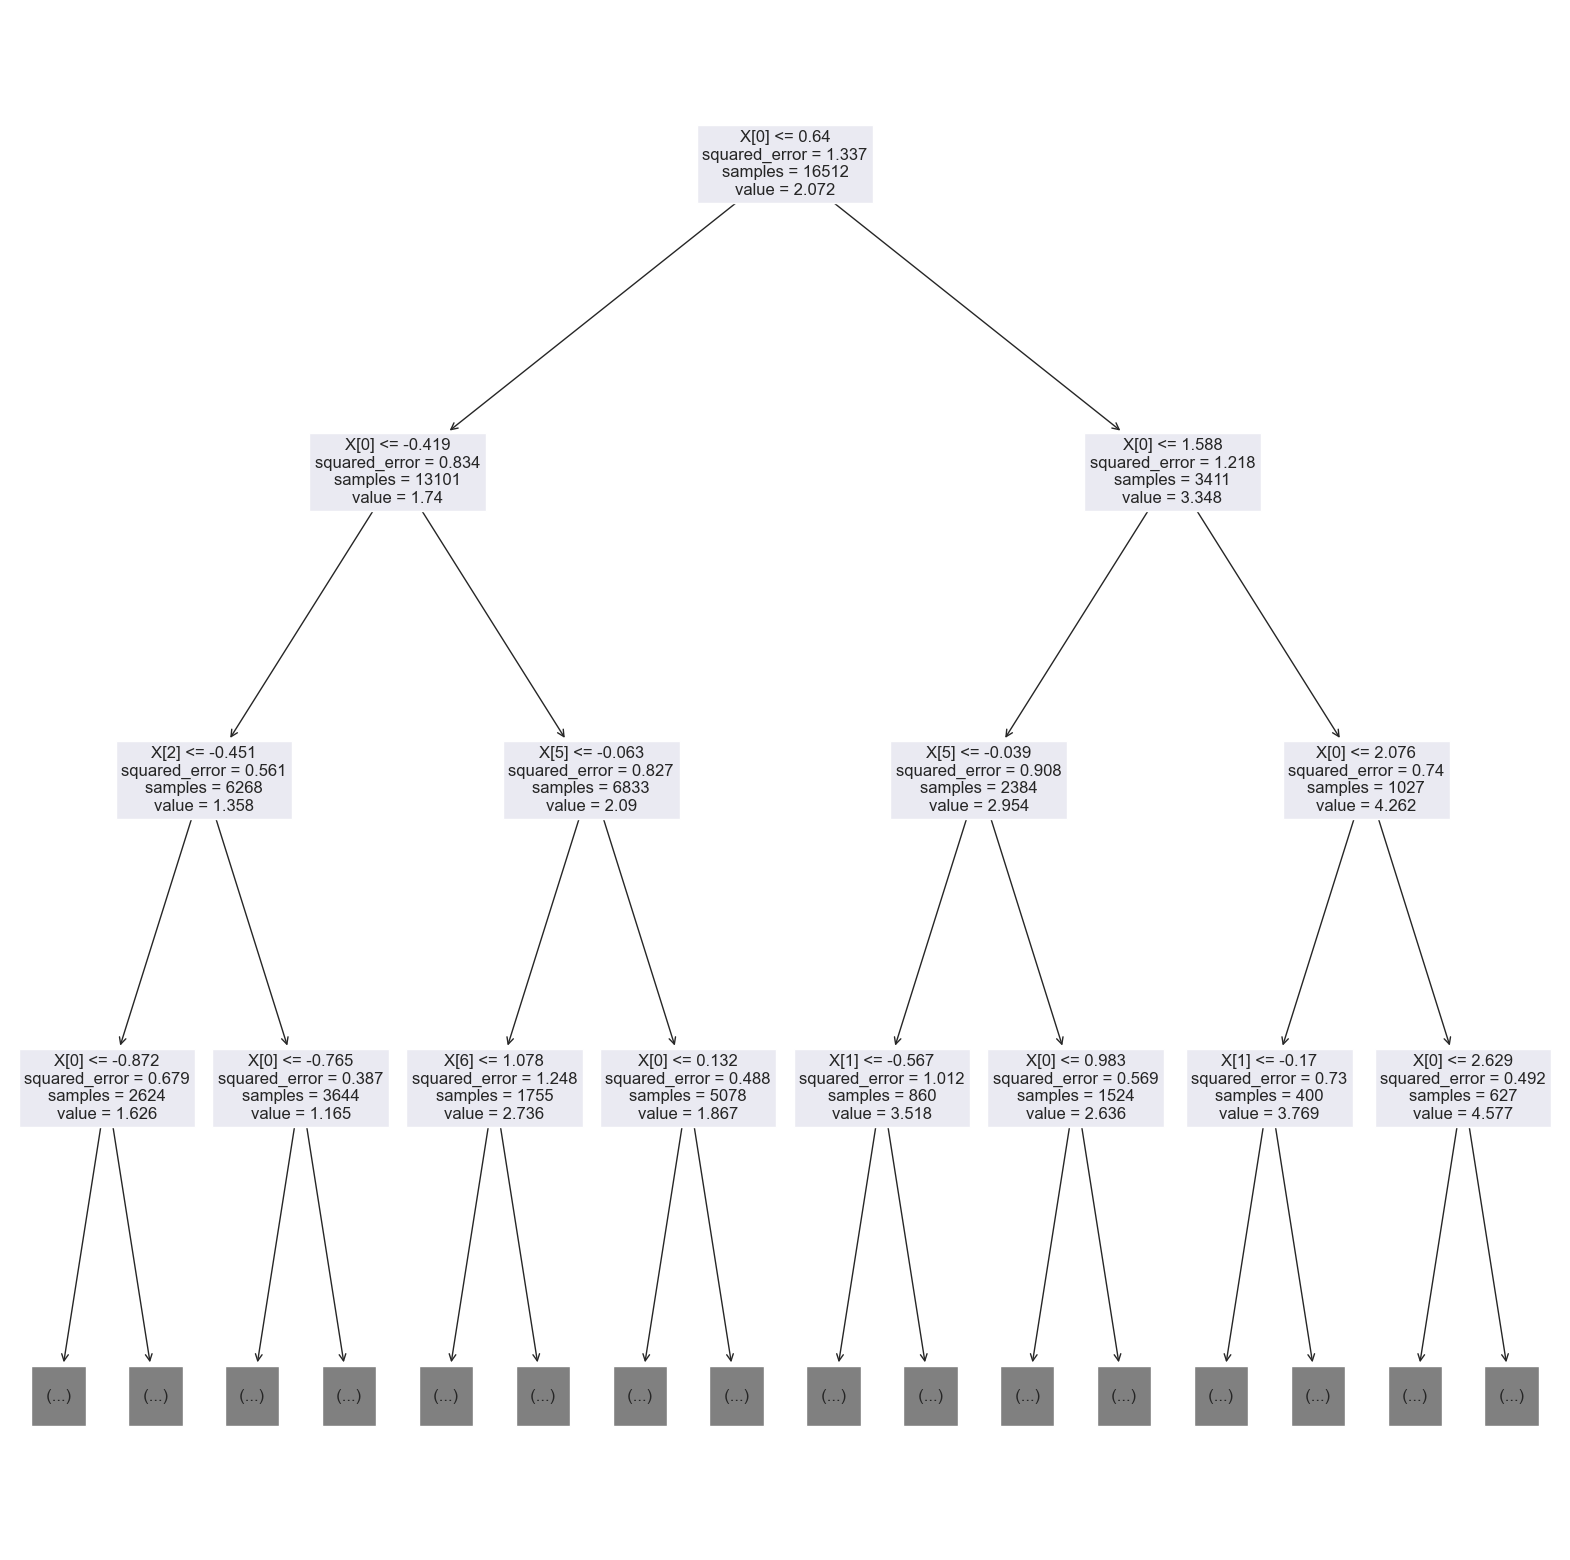

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(d_tree, feature_names=housing.feature_names, filled=True)

Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.
a. Повторите п. 5 для полученной модели.

In [13]:
d_tree_2 = DecisionTreeRegressor(random_state=42, max_depth=10, min_samples_split=100)
d_tree_2.fit(X_train, y_train)
d_tree_2.score(X_test, y_test)

score: 0.7088792441573417
params:  {'max_depth': 12, 'min_samples_split': 60}


# выводы
Даже без оптимизации, модель дерева решений показала большую точность (0.63 по сравнению с 0.57)
Однако, за счет оптимизации глубины дерева и минимального количества элементов для разделения, точность модели увеличилась до 0.7

Дерево решений целесообразно использовать, когда важно понимать правила принятия решений.
Также дерево решений можно хорошо визуализировать, что также упрощает понимание модели и результат.

SyntaxError: invalid syntax (3309045379.py, line 2)